#### Introduction to Statistical Learning, Lab 2.3

# Visualisation: Matplotlib & Seaborn

Visualising data and analysis results is very important data science. In the python environment the most popular visualisation libraries are *matplotlib* and *seaborn*.

>If matplotlib "tries to make easy things easy and hard things possible", seaborn tries to make a well-defined set of hard things easy too.

We first illustrate some matplotlib basics and then switch to seaborn. Throughout the course we will mostly use seaborn and only fall back to matplotlib for occasional tweaks or 3D plots. Keep in mind that seaborn is a set of convenience functions implemented on top of matplotlib.

We only scratch the surface here. Please refer to the tutorials for a more comprehensive coverage:

  - [matplotlib turorial](https://matplotlib.org/tutorials/index.html)
  - [seaborn tutorial](https://seaborn.pydata.org/tutorial.html)

We first import the libraries we learned about earlier.

In [1]:
import numpy as np
import pandas as pd
from islpy import datasets

#### matplotlib

We almost always only need the `pyplot` API from Matplotlib. It is conventionally imported like this:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

For higher resolution (and larger) plots adjust the dpi and execute this: 

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 92

Let's plot some functions.

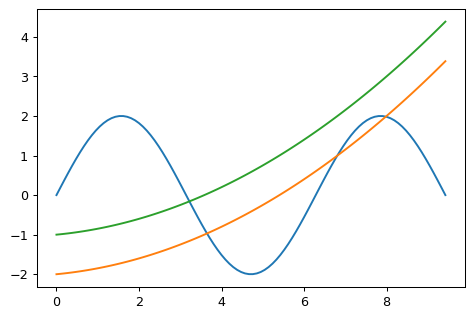

In [4]:
x = np.linspace(0, 3*np.pi, 100)
sine = 2*np.sin(x)
poly = np.polynomial.polynomial.polyval(x, [-2, 0.1, 0.05])
plt.plot(x, sine)
plt.plot(x, poly)
plt.plot(x, poly+1)
plt.show()

We make a scatter plot of a 2D Gaussian distribution.

In [ ]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)
fig = plt.figure()
plt.scatter(x,y)
plt.show()

The automatic aspect ratio is not ideal for this case. Let's try to make a square plot.

In [ ]:
fig = plt.figure()
fig.add_subplot(111, aspect='equal')
plt.scatter(x,y)
plt.show()


To make the plot really square we need to control the axis limits.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.scatter(x,y)
plt.show()


We can show several distributions in one plot. In this case labels and a legend are useful. We also add a title and axis labels.

In [ ]:
u = np.random.normal(loc=1.0, size=1000)
v = np.random.normal(loc=1.0, size=1000)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.scatter(x,y, label='xy')
plt.scatter(u,v, label='uv')
plt.legend()
plt.title("2D Gaussian Distributions")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Histograms are good for visualizing distributions. 

In [ ]:
plt.hist(x, bins=50)
plt.hist(u, bins=50)
plt.show()

We can show more than one plot in a figure. The colornames `'CN'` refer to the colors in the default color cycle.

In [ ]:
fig, ax = plt.subplots(2,2)
ax[0][0].hist(x, bins=50, color='C0')
ax[0][1].hist(y, bins=50, color='C1')
ax[1][0].hist(u, bins=50, color='C2')
ax[1][1].hist(v, bins=50, color='C3')
plt.show()

Now let's look at some data. We will use the `Auto` dataset.

In [ ]:
help(datasets.Auto)

In [ ]:
df = datasets.Auto()
df.tail()

In [ ]:
plt.scatter(df['mpg'], df['displacement'], label='displacement')
plt.scatter(df['mpg'], df['horsepower'], label='horsepower')
plt.yticks([])
plt.xlabel('mpg')
plt.title('Relations with mpg')
plt.legend()
plt.show()

In [ ]:
plt.hist(df['weight'], bins=20)
plt.show()

Matplotlib can treat 2D arrays as images.  This is useful to display heatmaps and such. Here we have a look at the `Digits` dataset, as it actually consists of images.

In [ ]:
help(datasets.Digits)

In [ ]:
train, test = datasets.Digits()

In [ ]:
train.head()

We use the `imshow` function with a grayscale colormap to display a digit from the dataset.

In [ ]:
idx = 37
digit = train.iloc[idx, 1:].to_numpy().reshape((16,16))
true_label = train.iloc[idx,0]
plt.title(f'True Label: {int(true_label)}')
plt.imshow(digit, cmap='Greys')
plt.show()

#### seaborn

Seaborn provides a set of convenience functions that greatly simplify common visualisation techniques in data analysis tasks.

We demonstrate a few basic features here and will expand our knowledge of the library throughout the course.

If you don't like how things look, please a have a look at the available themes. Don't go down the rabbit hole of tweaking the look of each plot yourself. This is generally a waste of time, unless you are forced to comply with some style guide.

Seaborn is conventionally imported like this:

In [ ]:
import seaborn as sns

Seaborn really shines when used with pandas data frames. We again look at the `Auto` data set. Note the automatic labels. Let's first look at a distribution.

In [ ]:
df = datasets.Auto()
sns.distplot(df['mpg'], bins=20, rug=True, kde=True)
plt.show()

A scatter plot, similar to what we did with matplotlib is done like this:

In [ ]:
sns.scatterplot(x='mpg', y='displacement', data=df)
plt.show() # we are still using matplotlib behind the scenes!

The same plot with an order 3 polynomial fitted to it.

In [ ]:
sns.scatterplot(x='mpg', y='displacement', data=df)
sns.regplot(x='mpg', y='displacement', order=3, scatter=False, color='C1', data=df)
plt.show()

Relation plots are more commonly used for visualisations like the above. Here is the same data displayed as a relation plot.

In [ ]:
sns.set_style('whitegrid')
sns.relplot(x='mpg', y='displacement', data=df)
plt.show()

We can encode additional information using colours.

In [ ]:
sns.relplot(x='mpg', y='displacement', hue='horsepower', data=df)
plt.show()

More information can be added using the marker size.

In [ ]:
sns.relplot(x='mpg', y='displacement', hue='horsepower', size='weight', data=df)
plt.show()

Even more information can be added using the marker style. The information density is very high now, but the plot is still very readable!

I would be rather complicated to do anything like that using the low-level matplotlib interface.

In [ ]:
sns.relplot(x='mpg', y='displacement', hue='horsepower', size='weight', style='origin', data=df)
plt.show()

*Pair plots* are a very good way to get an overview of a data set. Another thing that would be very complicated to do in matplotlib.

In [ ]:
sns.set_style('white')
sel = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
sns.pairplot(df, vars=sel, hue='origin')
plt.show()

*Categorical plots* are another common way to explore data sets. A very common one is the *box plot*. In categorical  plots the x axis usually corresponds to the categories. Here we use `origin` as a category in the `Auto` data set. Another example of plots that would be very hard to do in matplotlib directly.

In [ ]:
sns.boxplot(x='origin', y='mpg', data=df)
plt.show()

We can also use `cylinders` as a category:

In [ ]:
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.show()

And then split by origin as well (not all origins have all cylinder counts):

In [ ]:
sns.boxplot(x='cylinders', y='mpg', hue='origin', data=df)
plt.show()

Finally, let's display an entry from the `Digits` data set as a seaborn heat map. This is not very different from
the way we did it in matplotlib. Note that seaborn conveniently adds labels and a colour bar by default. This is most useful for non-image data.

In [ ]:
sns.heatmap(digit, cmap='Greys')
plt.show()